In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from statsmodels.multivariate.manova import MANOVA
from statsmodels.formula.api import ols
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df1 = pd.read_excel('1st_innings.xlsx')
df2 = pd.read_excel('2nd_innings.xlsx')

In [3]:
df1.drop('Team', axis=1, inplace=True)
df2.drop('Team', axis=1, inplace=True)
df1.drop('Inns', axis=1, inplace=True)
df2.drop('Inns', axis=1, inplace=True)
df1.drop('Ext', axis=1, inplace=True)
df2.drop('Ext', axis=1, inplace=True)

In [4]:
df1.head()

,Score,Overs,RPO,Result,b,lb,w,nb
0,195,48.5,3.99,lost,1,8,14,7
1,100,36.3,2.73,lost,0,14,15,3
2,267/6,50.0,5.34,won,0,6,1,5
3,226/6,50.0,4.52,lost,0,14,7,8
4,248/8,50.0,4.96,lost,1,4,9,3


In [5]:
df2.head()

,Score,Overs,RPO,Result,b,lb,w,nb
0,241/6,50.0,4.82,lost,0,8,10,7
1,230,46.5,4.91,lost,0,5,13,4
2,177,46.5,3.77,lost,1,1,7,7
3,157,46.0,3.41,lost,0,4,6,4
4,302/7,49.4,6.08,won,1,6,13,7


In [6]:
df1.dtypes

,0
Score,object
Overs,float64
RPO,float64
Result,object
b,int64
lb,int64
w,int64
nb,int64


In [7]:
df2.dtypes

,0
Score,object
Overs,float64
RPO,float64
Result,object
b,int64
lb,int64
w,int64
nb,int64


##**Data Preprocessing**

In [8]:
# Separate Score and wickets from scorecard and add a wickets column
def extract_score_wickets(score):
    try:
        if '/' in str(score):
            score_part, wickets_part = str(score).split('/')
            return int(score_part), int(wickets_part)
        else:
            return int(score), 10  # If '/' is not present, wickets is 10
    except ValueError:
        return 0, 0  # Handle cases where the format is unexpected

df1[['Score', 'Wickets']] = df1['Score'].apply(lambda x: pd.Series(extract_score_wickets(x)))
df2[['Score', 'Wickets']] = df2['Score'].apply(lambda x: pd.Series(extract_score_wickets(x)))

def convert_win_loss(result):
    if result == 'won':
        return 1
    elif result == 'lost':
        return 0

df1['Result'] = df1['Result'].apply(convert_win_loss)
df2['Result'] = df2['Result'].apply(convert_win_loss)

# Converting overs to number of balls so as overs are represented in heximal system
def overs_to_balls(overs):
    try:
        if isinstance(overs, str):
            overs = float(overs)

        full_overs = int(overs)
        partial_overs = int((overs - full_overs) * 10)

        total_balls = (full_overs * 6) + partial_overs
        return total_balls
    except (ValueError, TypeError):
        return 0

df1['Overs'] = df1['Overs'].apply(overs_to_balls)
df2['Overs'] = df2['Overs'].apply(overs_to_balls)

# Renaming overs column to balls
df1 = df1.rename(columns={'Overs': 'Balls'})
df2 = df2.rename(columns={'Overs': 'Balls'})

##**Exploratory Data Analysis**

In [9]:
# Summary statistics
print(df1.describe())
print(df2.describe())

            Score       Balls         RPO      Result           b          lb  \
count  138.000000  138.000000  138.000000  138.000000  138.000000  138.000000   
mean   259.268116  289.630435    5.345725    0.536232    0.913043    5.094203   
std     65.950605   27.402934    1.208055    0.500502    1.549562    3.068292   
min    100.000000  132.000000    2.620000    0.000000    0.000000    0.000000   
25%    215.500000  294.000000    4.465000    0.000000    0.000000    3.000000   
50%    265.000000  300.000000    5.360000    1.000000    0.000000    5.000000   
75%    301.000000  300.000000    6.110000    1.000000    1.000000    7.000000   
max    414.000000  300.000000    8.280000    1.000000    6.000000   14.000000   

                w          nb     Wickets  
count  138.000000  138.000000  138.000000  
mean     8.862319    2.963768    7.565217  
std      5.390167    3.021600    2.211306  
min      0.000000    0.000000    2.000000  
25%      5.000000    1.000000    6.000000  
50%   

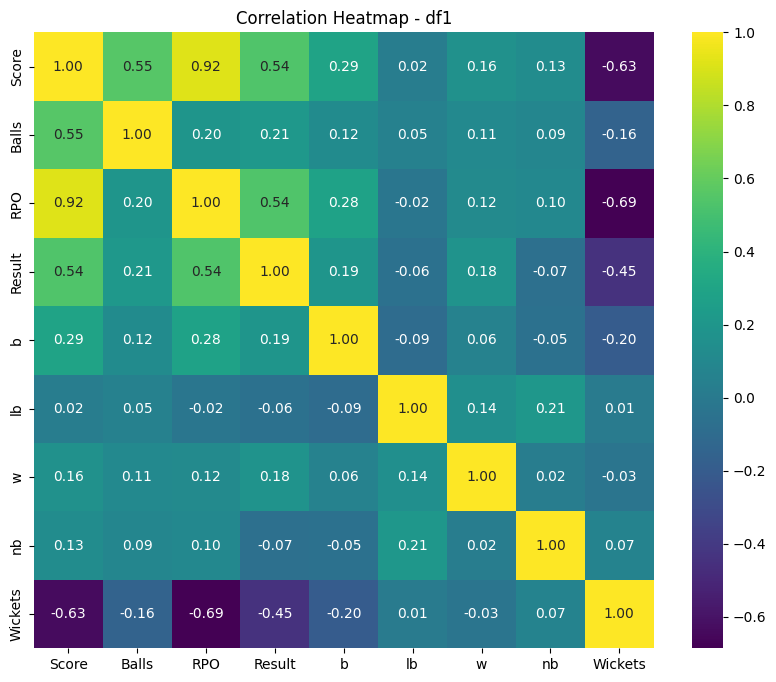

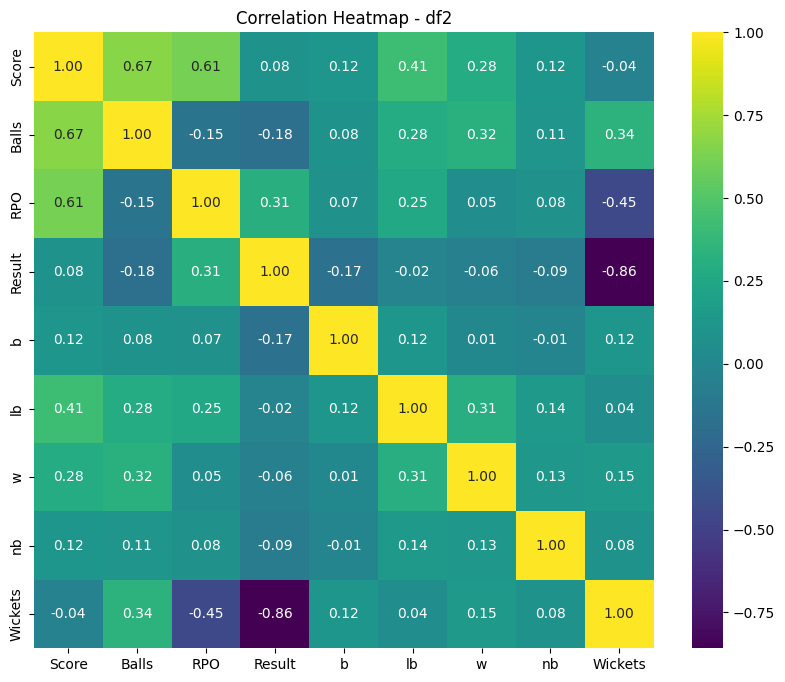

In [10]:
# Correlation between each variable for both the datasets

plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap - df1')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap - df2')
plt.show()

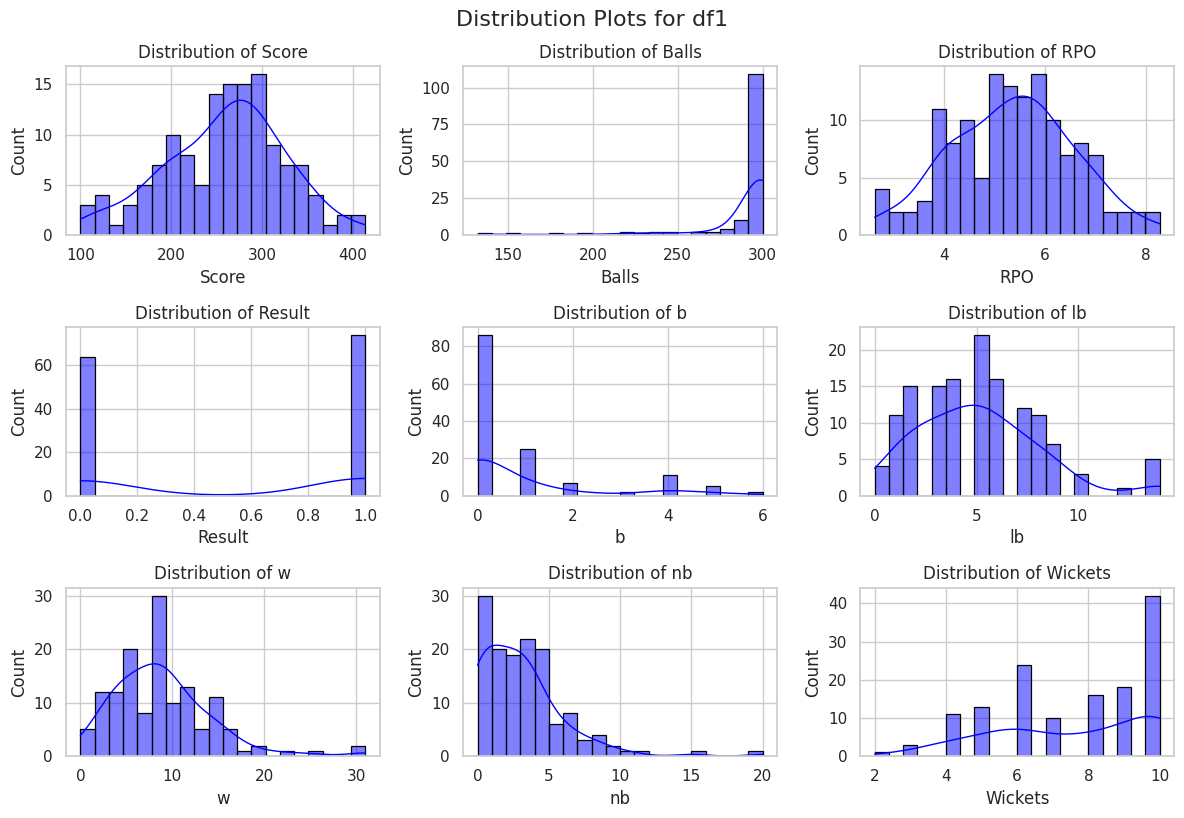

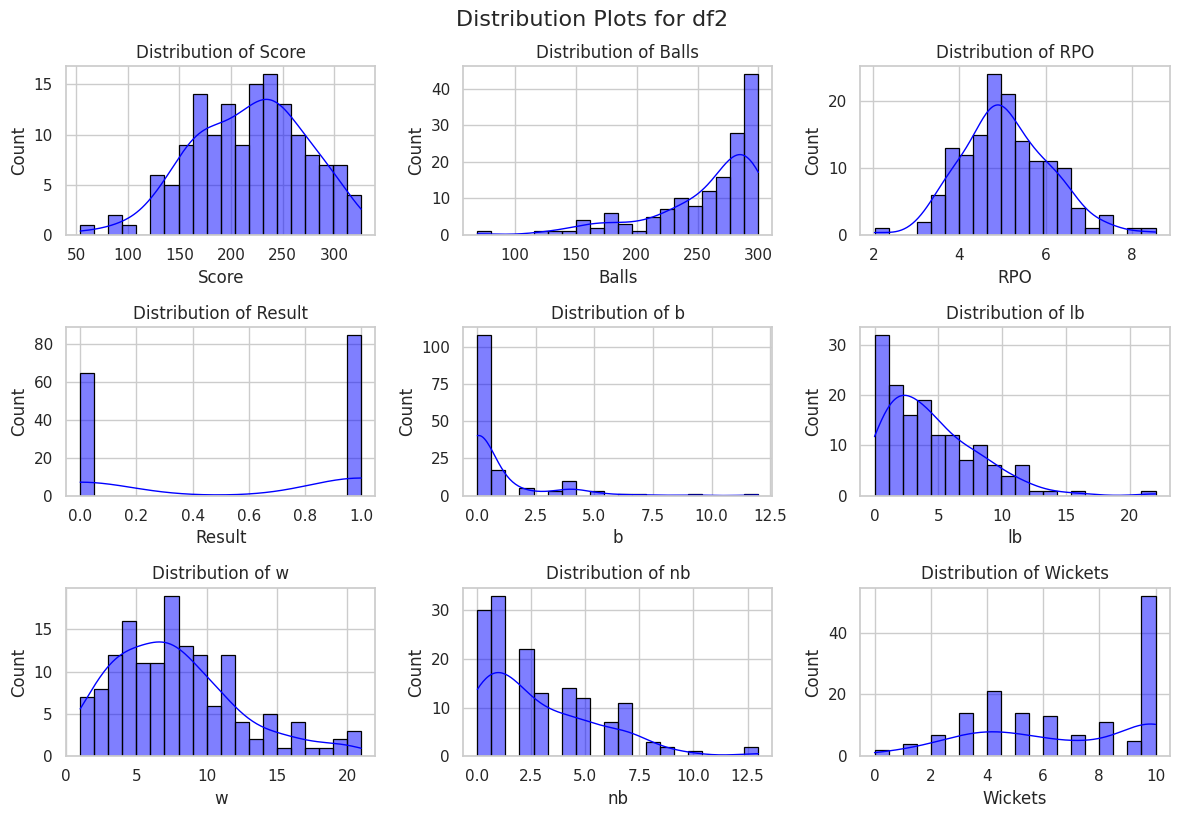

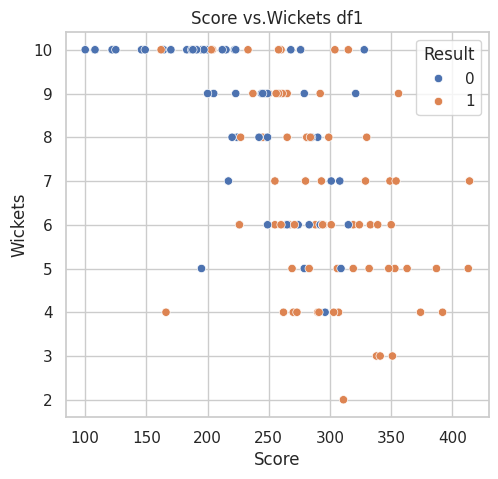

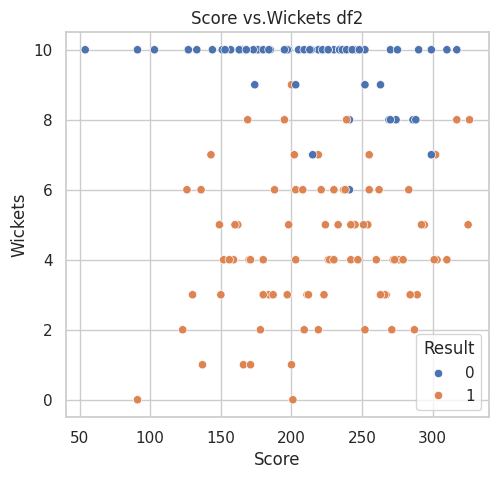

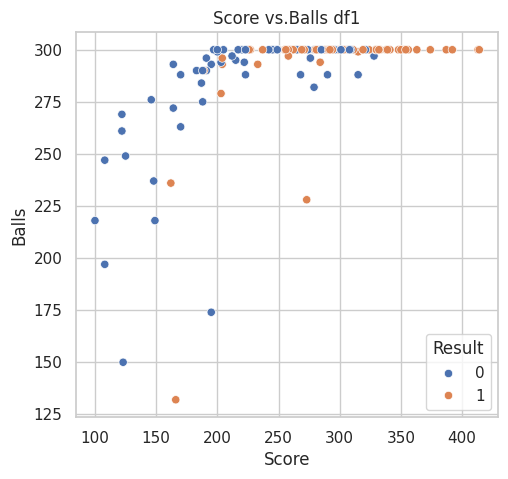

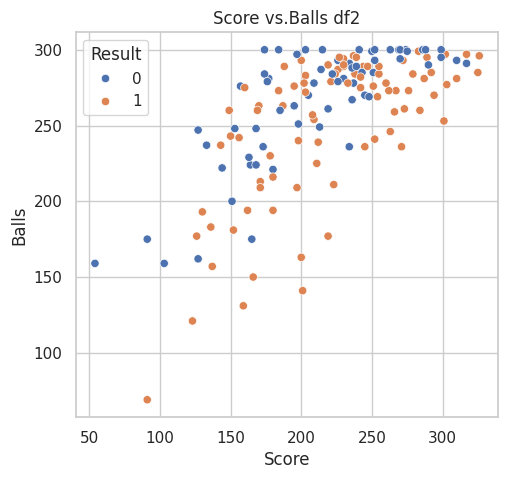

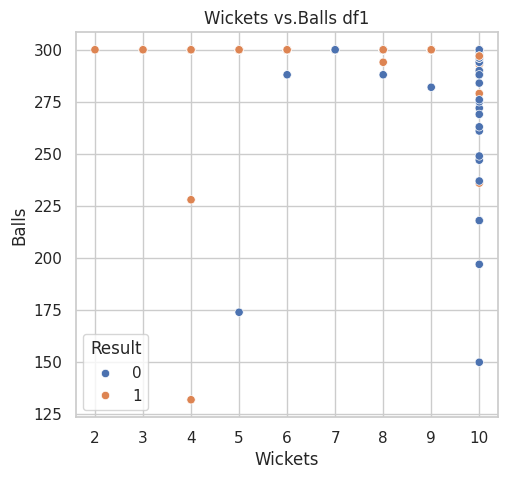

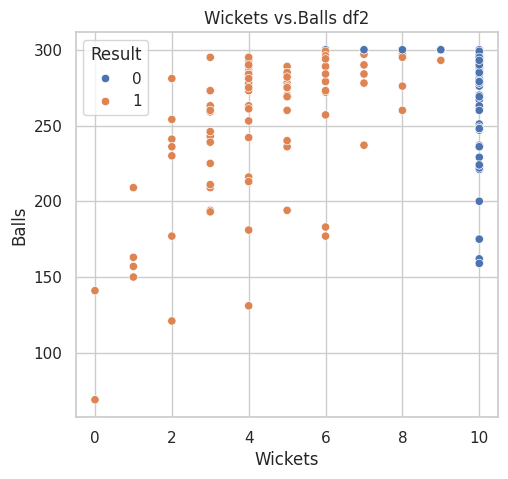

In [11]:
sns.set(style="whitegrid")

# Plot histograms and distribution of each variable
def plot_distribution(data, title):
    plt.figure(figsize=(12, 8))
    for i, column in enumerate(data.columns, 1):
        plt.subplot(3,3,i)
        sns.histplot(data[column], kde=True, bins=20, color='blue', edgecolor='black', alpha=0.5, line_kws={'color': 'blue', 'linewidth': 1})
        plt.title(f'Distribution of {column}')
    plt.tight_layout()
    plt.suptitle(title, y=1.02, fontsize=16)
    plt.show()

# scatter plot of two variables
def scatter_plot(data,a,b,dataname):
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  sns.scatterplot(data=data, x=a, y=b, hue='Result')
  plt.title(a+' vs.'+b+' '+dataname)
  plt.xlabel(a)
  plt.ylabel(b)

plot_distribution(df1, 'Distribution Plots for df1')
plot_distribution(df2, 'Distribution Plots for df2')

scatter_plot(df1,'Score','Wickets','df1')
scatter_plot(df2,'Score','Wickets','df2')

scatter_plot(df1,'Score','Balls','df1')
scatter_plot(df2,'Score','Balls','df2')

scatter_plot(df1,'Wickets','Balls','df1')
scatter_plot(df2,'Wickets','Balls','df2')

In [12]:
# Storing mean and covariance of each dataset
mean_1 = df1.mean()
mean_2 = df2.mean()
cov_1 = df1.cov()
cov_2 = df2.cov()

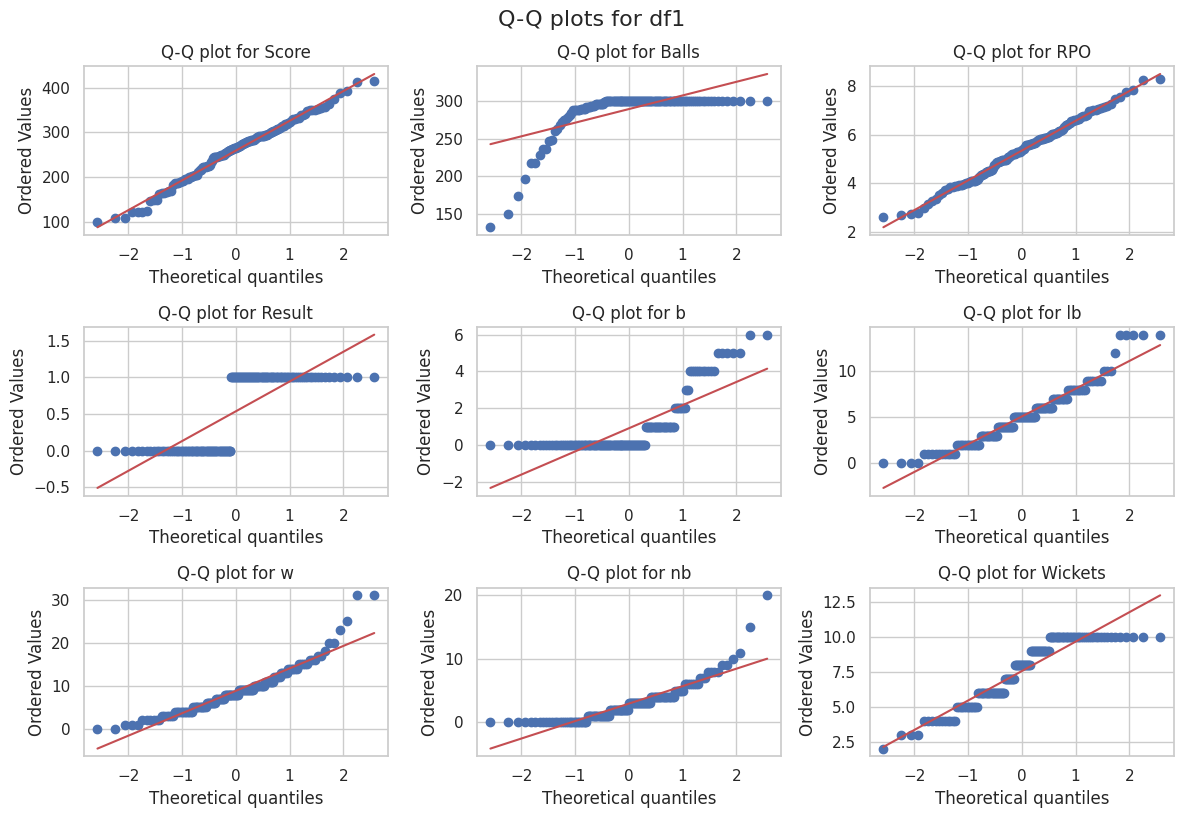

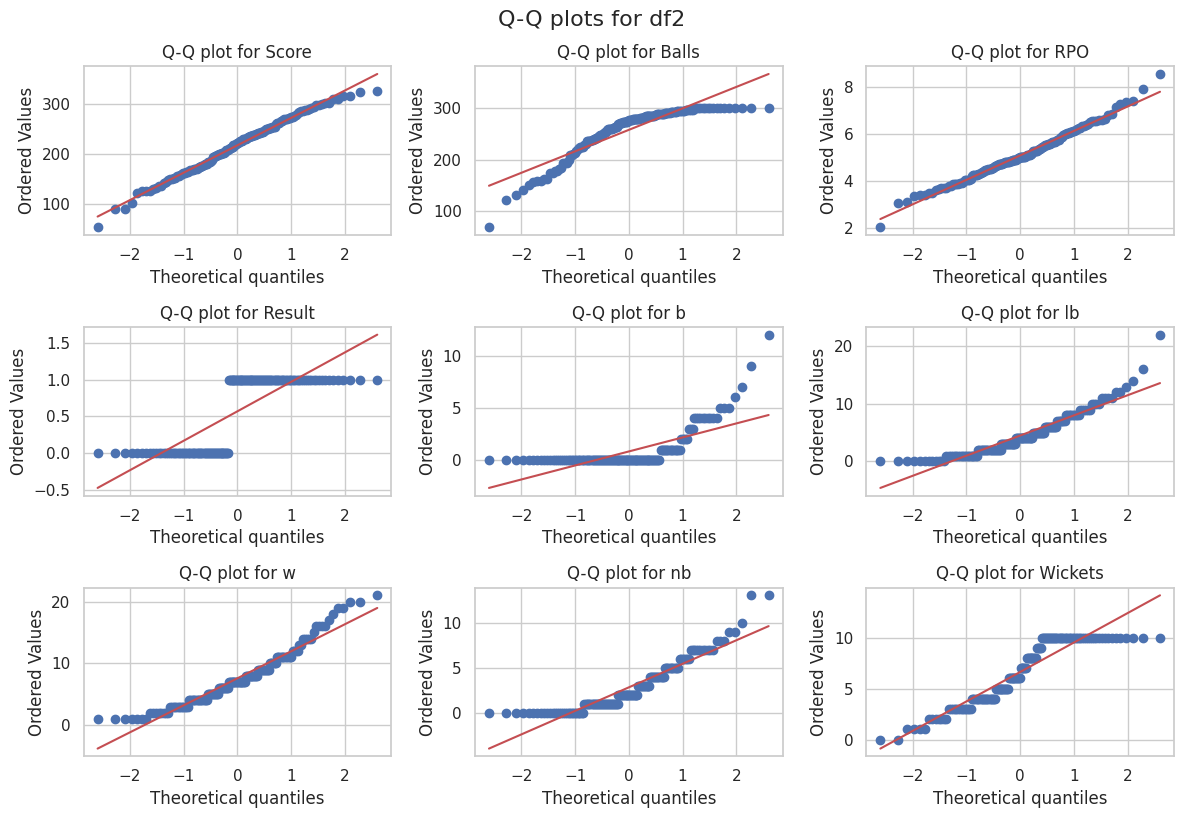

In [13]:
# Q-Q plots to check normality of each variable
def qq_plot(data, title):
    plt.figure(figsize=(12, 8))
    for i, column in enumerate(data.columns, 1):
        plt.subplot(3, 3, i)
        stats.probplot(data[column], dist="norm", plot=plt)
        plt.title(f'Q-Q plot for {column}')

    plt.tight_layout()
    plt.suptitle(title, y=1.02, fontsize=16)
    plt.show()

qq_plot(df1, 'Q-Q plots for df1')
qq_plot(df2, 'Q-Q plots for df2')

**Mahalanobis distance and Outlier detection**

10
10


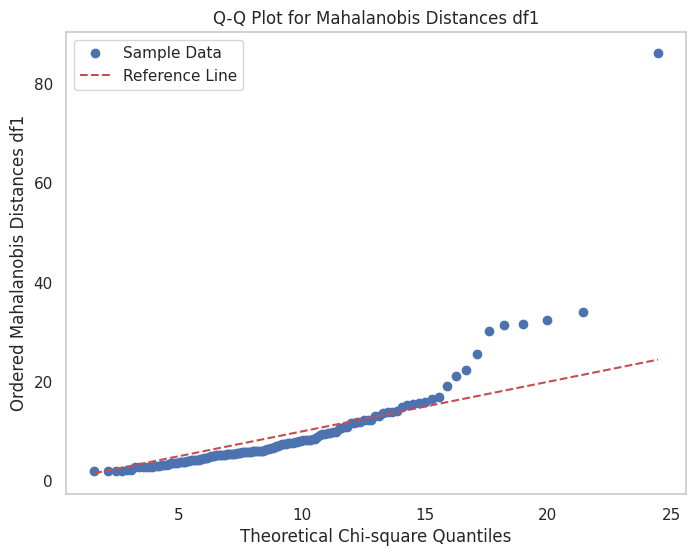

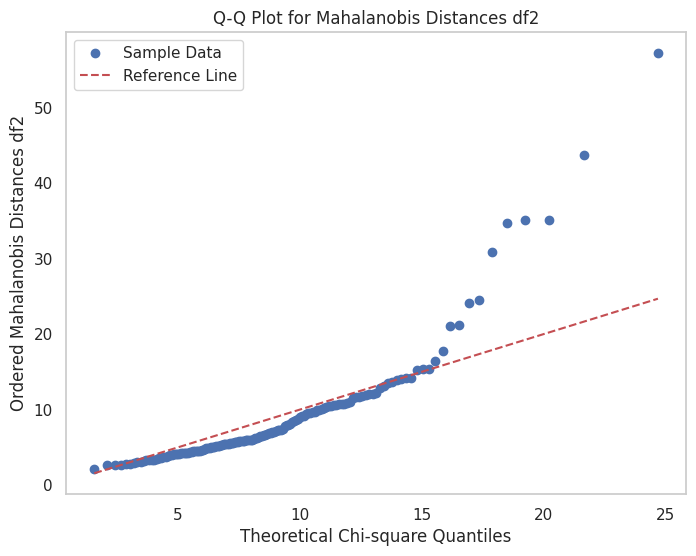

In [14]:
# Identification of outliers using Mahalanobis distance
# Threshold for Mahalanobis distance is defined by significance value 2.5%
# calculate the chi-square statistic to remove outliers (sample mean and sample variance are estimators)
# 9 dimensions => 9 degrees of freedom => chi-square threshold is 19.023

cov_1_inverse = np.linalg.inv(cov_1)
cov_2_inverse = np.linalg.inv(cov_2)

def mahalanobis_distance(x, mean, cov_inverse):
    x_minus_mean = x - mean
    distance = np.dot(np.dot(x_minus_mean, cov_inverse), x_minus_mean.T)
    return distance

distances_1= []
distances_2= []
outliers_1 = []
outliers_2 = []

for index, row in df1.iterrows():
    distance = mahalanobis_distance(row, mean_1, cov_1_inverse)
    distances_1.append(distance)
    if distance > 19.023:
        outliers_1.append(index)

for index, row in df2.iterrows():
    distance = mahalanobis_distance(row, mean_2, cov_2_inverse)
    distances_2.append(distance)
    if distance > 19.023:
        outliers_2.append(index)

print(len(outliers_1))
print(len(outliers_2))

# Q-Q plot of Mahalanobis distance to check for normality
def qq_plot_distance(distances, degrees_of_freedom, dataname):
  sorted_distances = np.sort(distances)
  chi2_quantiles = stats.chi2.ppf((np.arange(1, len(sorted_distances) + 1) - 0.5) / len(sorted_distances), df=degrees_of_freedom)

  plt.figure(figsize=(8, 6))
  plt.plot(chi2_quantiles, sorted_distances, 'o', label='Sample Data')
  plt.plot([min(chi2_quantiles), max(chi2_quantiles)], [min(chi2_quantiles), max(chi2_quantiles)], 'r--', label='Reference Line')
  plt.xlabel('Theoretical Chi-square Quantiles')
  plt.ylabel('Ordered Mahalanobis Distances '+dataname)
  plt.title('Q-Q Plot for Mahalanobis Distances '+dataname)
  plt.legend()
  plt.grid()
  plt.show()

dof = df1.shape[1]
qq_plot_distance(distances_1,dof,'df1')
qq_plot_distance(distances_2,dof,'df2')

for i in range(len(outliers_1)):
    df1.drop(outliers_1[i], inplace=True)

for i in range(len(outliers_2)):
    df2.drop(outliers_2[i], inplace=True)

In [15]:
mean_1 = df1.mean()
mean_2 = df2.mean()
cov_1 = df1.cov()
cov_2 = df2.cov()

0
0


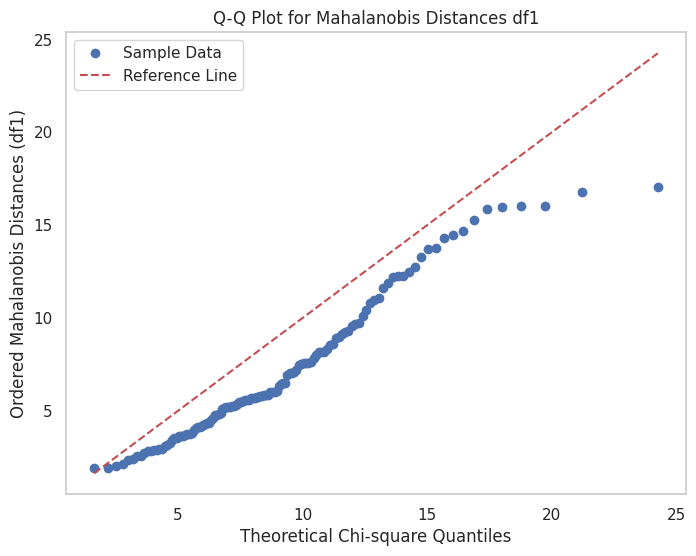

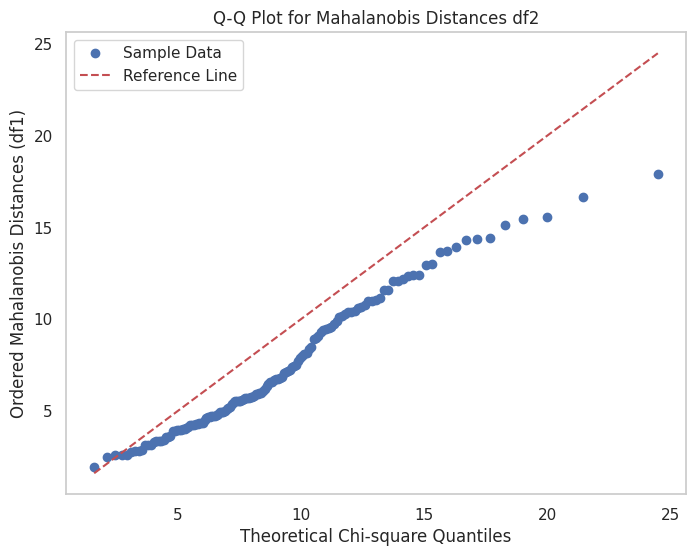

In [16]:
# Finding Mahalanobis distance after removing outliers to check normality
def mahalanobis_distance(x, mean, cov_inverse):
    x_minus_mean = x - mean
    distance = np.dot(np.dot(x_minus_mean, cov_inverse), x_minus_mean.T)
    return distance

distances_1= []
distances_2= []
outliers_1 = []
outliers_2 = []

for index, row in df1.iterrows():
    distance = mahalanobis_distance(row, mean_1, cov_1_inverse)
    distances_1.append(distance)
    if distance > 19.023:
        outliers_1.append(index)

for index, row in df2.iterrows():
    distance = mahalanobis_distance(row, mean_2, cov_2_inverse)
    distances_2.append(distance)
    if distance > 19.023:
        outliers_2.append(index)

print(len(outliers_1))
print(len(outliers_2))

# Q-Q plot of Mahalanobis distance to check for normality
def qq_plot_distance(distances, degrees_of_freedom, dataname):
  sorted_distances = np.sort(distances)
  chi2_quantiles = stats.chi2.ppf((np.arange(1, len(sorted_distances) + 1) - 0.5) / len(sorted_distances), df=degrees_of_freedom)

  plt.figure(figsize=(8, 6))
  plt.plot(chi2_quantiles, sorted_distances, 'o', label='Sample Data')
  plt.plot([min(chi2_quantiles), max(chi2_quantiles)], [min(chi2_quantiles), max(chi2_quantiles)], 'r--', label='Reference Line')
  plt.xlabel('Theoretical Chi-square Quantiles')
  plt.ylabel('Ordered Mahalanobis Distances (df1)')
  plt.title('Q-Q Plot for Mahalanobis Distances '+dataname)
  plt.legend()
  plt.grid()
  plt.show()

dof = df1.shape[1]
qq_plot_distance(distances_1,dof,'df1')
qq_plot_distance(distances_2,dof,'df2')

##**Comparing Covariance and Mean using hypothesis testing**

In [17]:
# Covariance and mean comparision
# Testing whether sample covariances are equal for both the datasets
# We use F-test for hypothesis testing at the significance level of 5%

x = df1.shape
y = df2.shape
d = np.ones(x[1],dtype=int)
f_statistic = np.dot(d,np.dot(cov_1,d.T))/np.dot(d,np.dot(cov_2,d.T))
alpha = 0.05
f_critical = stats.f.ppf(1-alpha,x[0]-1,y[0]-1)
if f_critical < f_statistic:
    print('[F_statictic, F_critical]', np.array([f_statistic,f_critical]))
    print("Reject the null hypothesis that covariance of two datasets are equal")
else:
    print('[F_statictic, F_critical]', np.array([f_statistic,f_critical]))
    print("Failed to reject the null hypothesis that covariance of two datasets are equal")

# Now we check for the equivalence of means
# We use T-test for hypothesis testing and find F-statistic to find p-value and conlcude at the significance level of 5%
pooled_variance = ((x[0]-1)*cov_1 + (y[0]-1)*cov_2) / (x[0] + y[0] - 2)
t2_statistic = ((x[0]*y[0])/(x[0]+y[0]))*np.dot((mean_1-mean_2).T,np.dot(np.linalg.inv(pooled_variance),(mean_1-mean_2)))
print('T^2 statistic is for testing of means is', t2_statistic)
F_statistic = ((x[0]+y[0]-1-x[1])/((x[0]+y[0]-2)*x[1]))*t2_statistic
F_critical = stats.f.ppf(1-alpha,x[1],x[0]+y[0]-1-x[1])
if F_critical < F_statistic:
    print('[F_statictic, F_critical]', np.array([F_statistic,F_critical]))
    print("Reject the null hypothesis that sample means of two datasets are equal")
else:
    print('[F_statictic, F_critical]', np.array([F_statistic,F_critical]))
    print("Failed to reject the null hypothesis that sample means of two datasets are equal")

[F_statictic, F_critical] [0.71667369 1.33042525]
Failed to reject the null hypothesis that covariance of two datasets are equal
T^2 statistic is for testing of means is 94.03793236883261
[F_statictic, F_critical] [10.13441376  1.91627638]
Reject the null hypothesis that sample means of two datasets are equal


##**Profile Analysis**

In [18]:
# Profile Analysis

# Test-1 : Test for parallel profiles
# Ho : mean_1_(k) - mean_2_(k) = mean_1_(k-1) - mean_2_(k-1) for k = 2,3,....,p against Ha : Ho is not true
# Ho can be rewritten as C(mean_1) = C(mean_2) where C is a (p-1)*p matrix with c(i,i)=1, c(i,i-1)=-1
mat1 = np.diag(np.ones(mean_1.shape[0], dtype=int))
mat1 = np.delete(mat1, mean_1.shape[0] - 1, 0)
mat1 = -1 * mat1
mat2 = np.diag(np.ones(mean_2.shape[0] - 1, dtype=int))
column = np.zeros((mat2.shape[0], 1), dtype=int)
mat2 = np.hstack([column, mat2])
C = mat1 + mat2
t2_statistic = ((x[0]*y[0])/(x[0]+y[0]))*np.dot(np.dot((mean_1 - mean_2),C.T),np.dot(np.linalg.inv(np.dot(C,np.dot(pooled_variance,C.T))), np.dot(C,(mean_1 - mean_2).T)))
print('T^2 satistic is', t2_statistic)
f_statistic = (x[0]+y[0]-x[1])/((x[1]-1)*(x[0]+y[0]-2))*t2_statistic
alpha = 0.05
f_critical = stats.f.ppf(1-alpha,x[1]-1,x[0]+y[0]-x[1])
if f_critical < f_statistic:
    print('[F_statictic, F_critical]', np.array([f_statistic,f_critical]))
    print("Reject the null hypothesis that profiles are parallel")
else:
    print('[F_statictic, F_critical]', np.array([f_statistic,f_critical]))
    print("Failed to reject the null hypothesis that profiles are parallel")

# Test-2 : Test for coincident profiles
# Ho : mean_1_k = mean_2_k for k = 1,2,...,p against Ha : Ho is not true
# Ho can be rewritten as 1.T(mean_1-mean_2) = 0
# ones = np.ones(x[1], dtype=int)
# t2_statistic = ((x[0]*y[0])/(x[0]+y[0]))*np.dot((mean_1-mean_2),ones.T)*np.dot(ones,(mean_1 - mean_2).T)/np.dot(ones,np.dot(pooled_variance,ones.T))
# print(t2_statistic)
# f_statistic = t2_statistic # as dim = 1
# f_critical = stats.f.ppf(1-alpha,1,x[0]+y[0]-2)
# if f_critical < f_statistic:
#     print('[F_statictic, F_critical]', np.array([f_statistic,f_critical]))
#     print("Reject the null hypothesis profiles are coincident")
# else:
#     print('[F_statictic, F_critical]', np.array([f_statistic,f_critical]))
#     print("Fail to reject the null hypothesis that profiles are coincident")

T^2 satistic is 94.02052000027645
[F_statictic, F_critical] [11.44328697  1.97425181]
Reject the null hypothesis that profiles are parallel


##**MANOVA**

In [19]:
def perform_anova_accross_datasets(df1, df2):
  df = pd.concat([df1, df2], ignore_index=True)
  df['Group']=['df1']*len(df1)+['df2']*len(df2)
  manova = MANOVA.from_formula('Score + Balls + Wickets + RPO + b + lb + w + nb ~ Group', data=df)
  print('Monova accross datasets using dataset as group:', manova.mv_test())

def perform_manova_test_using_result(df1, df2):
  df = pd.concat([df1, df2], ignore_index=True)
  manova = MANOVA.from_formula('Score + Balls + Wickets + RPO + b + lb + w + nb ~ Result', data=df)
  print('Monova accross datasets using result as group:', manova.mv_test())

perform_anova_accross_datasets(df1, df2)
perform_manova_test_using_result(df1, df2)

Monova accross datasets using dataset as group:                     Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept         Value   Num DF  Den DF   F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda   0.0013 8.0000 259.0000 25090.6352 0.0000
         Pillai's trace   0.9987 8.0000 259.0000 25090.6352 0.0000
 Hotelling-Lawley trace 775.0003 8.0000 259.0000 25090.6352 0.0000
    Roy's greatest root 775.0003 8.0000 259.0000 25090.6352 0.0000
------------------------------------------------------------------
                                                                  
-------------------------------------------------------------------
          Group           Value   Num DF   Den DF   F Value  Pr > F
-------------------------------------------------------------------
           Wilks' lambda  0.7427

**Principal Component Analysis(PCA)**

Explained Variance: [0.31670504 0.19245751 0.13463513 0.11046065 0.10248982 0.09009522
 0.05248565 0.00067098]


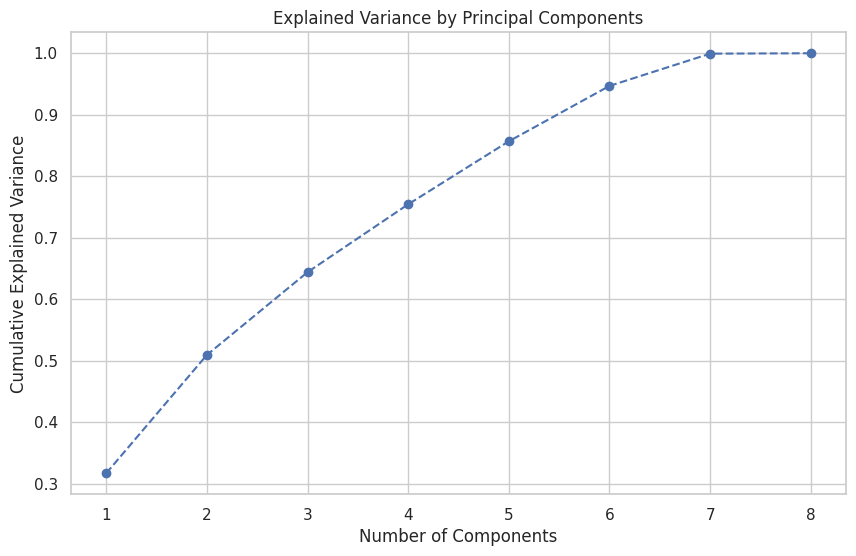

[[ 0.60564732  0.38119431  0.52780777  0.21056082  0.26178055  0.22413287
   0.07757464 -0.20045671]
 [-0.05845066  0.40582419 -0.32947517 -0.07664076  0.32292184  0.35318289
   0.35593834  0.60145971]
 [ 0.03605289  0.19288638 -0.09240397  0.71567183 -0.38687839  0.02605271
  -0.41042789  0.34923587]
 [ 0.0646117   0.03895298  0.0611434   0.26170305 -0.30242037 -0.49684403
   0.76242557  0.0497612 ]
 [-0.17104467 -0.48357208  0.0755378   0.32433535 -0.11804725  0.69118852
   0.33510055 -0.14843613]
 [-0.1651761  -0.26912229 -0.05153874  0.48029497  0.75637999 -0.3061742
  -0.0318978  -0.00893054]
 [ 0.18106232 -0.46871728  0.50273828 -0.18206849 -0.00352367 -0.07745824
  -0.06494393  0.67186006]
 [ 0.73142148 -0.35399222 -0.5826492  -0.00949055 -0.00109537 -0.00309373
   0.00432686 -0.01060564]]
                0         1         2         3         4         5         6  \
Score    0.605647 -0.058451  0.036053  0.064612 -0.171045 -0.165176  0.181062   
Balls    0.381194  0.405824  0

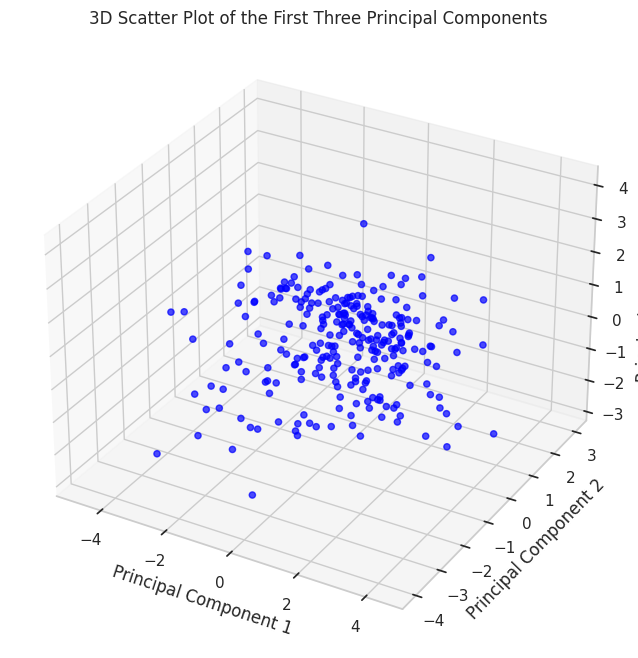

In [20]:
# Principal Component Analysis (PCA)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.concat([df1, df2], axis=0)
Y = df.drop('Result', axis=1)
Y_scaled = StandardScaler().fit_transform(Y)

pca = PCA(n_components=df.shape[1]-1)
principal_components = pca.fit_transform(Y_scaled)

explained_variance = pca.explained_variance_ratio_
print("Explained Variance:", explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

print(pca.components_)

components = pd.DataFrame(pca.components_.T, index=Y.columns)
print(components)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(principal_components[:, 0],
           principal_components[:, 1],
           principal_components[:, 2],
           c='blue', marker='o', alpha=0.7)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Scatter Plot of the First Three Principal Components')

plt.show()

**Logistic Regression**

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

def Logistic_Regression(df,dataname):
  y = df['Result']
  X = df.drop('Result', axis=1)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  logistic_model = LogisticRegression(max_iter=1000)
  logistic_model.fit(X_train, y_train)

  y_pred = logistic_model.predict(X_test)
  y_prob = logistic_model.predict_proba(X_test)[:, 1]

  print("Logistic Regression Results for "+dataname)
  print("Coefficients:", logistic_model.coef_)
  print("Intercept:", logistic_model.intercept_)
  print("Coefficients:", list(zip(X.columns, logistic_model.coef_[0])))

  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy: {accuracy}")
  print("Classification Report:")
  print(classification_report(y_test, y_pred))

  conf_matrix = confusion_matrix(y_test, y_pred)
  print("Confusion Matrix:")
  print(conf_matrix)

  roc_auc = roc_auc_score(y_test, y_prob)
  print(f"ROC-AUC Score: {roc_auc}")

  fpr, tpr, thresholds = roc_curve(y_test, y_prob)

  plt.figure(figsize=(10, 6))
  plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='red', linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc='lower right')
  plt.grid(True)
  plt.show()

###**Logistic Regression Results for 1st_innings(df1)**

Logistic Regression Results for df1
Coefficients: [[ 0.03071015 -0.02067735 -0.07658948 -0.08645911 -0.01487896  0.11816664
  -0.12297258 -0.05888683]]
Intercept: [-1.37109618]
Coefficients: [('Score', 0.030710148542494355), ('Balls', -0.020677347722858272), ('RPO', -0.07658947717093247), ('b', -0.08645911096133613), ('lb', -0.014878959111389381), ('w', 0.11816663548708246), ('nb', -0.12297258108213299), ('Wickets', -0.05888683059318432)]
Accuracy: 0.7692307692307693
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.91      0.77        11
           1       0.91      0.67      0.77        15

    accuracy                           0.77        26
   macro avg       0.79      0.79      0.77        26
weighted avg       0.81      0.77      0.77        26

Confusion Matrix:
[[10  1]
 [ 5 10]]
ROC-AUC Score: 0.9272727272727272


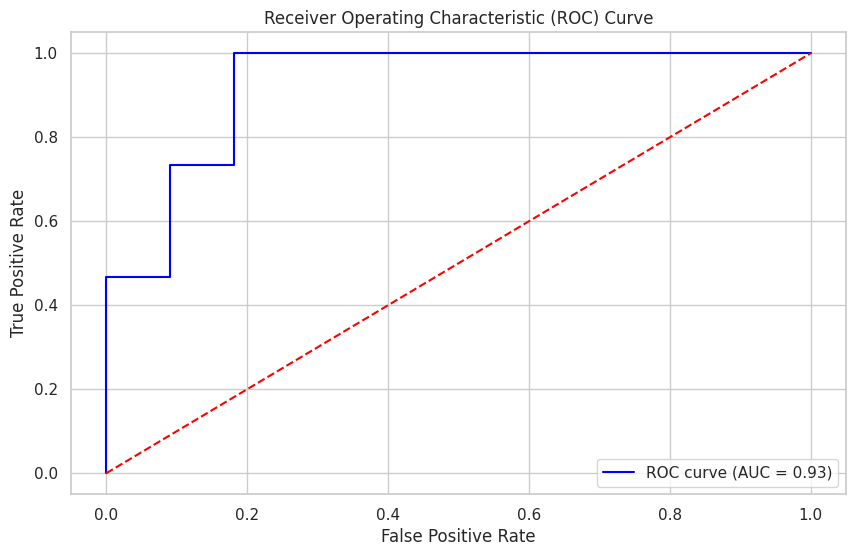

In [22]:
Logistic_Regression(df1,'df1')

###**Logistic Regression Results for 2nd_innings(df2)**

Logistic Regression Results for df2
Coefficients: [[-2.32690915e-02  7.97631150e-04  9.18249269e-02 -3.60523171e-01
   1.23383282e-01  5.87389648e-02 -1.53015145e-02 -1.83056521e+00]]
Intercept: [17.46883282]
Coefficients: [('Score', -0.023269091496720726), ('Balls', 0.0007976311502839023), ('RPO', 0.09182492689826174), ('b', -0.3605231706404954), ('lb', 0.12338328174654978), ('w', 0.05873896482789118), ('nb', -0.015301514465712712), ('Wickets', -1.8305652051443828)]
Accuracy: 0.8928571428571429
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        12
           1       1.00      0.81      0.90        16

    accuracy                           0.89        28
   macro avg       0.90      0.91      0.89        28
weighted avg       0.91      0.89      0.89        28

Confusion Matrix:
[[12  0]
 [ 3 13]]
ROC-AUC Score: 0.9895833333333334


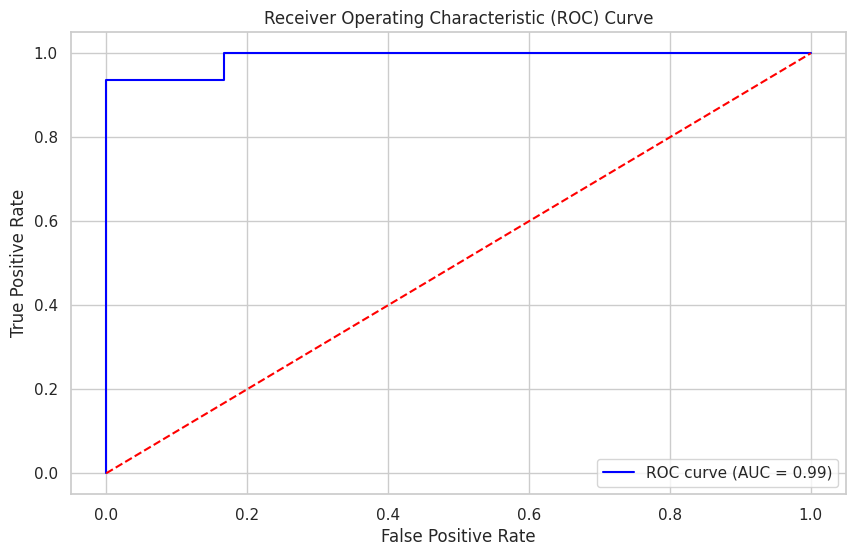

In [23]:
Logistic_Regression(df2,'df2')

###**Factor Analysis**

In [24]:
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

def Factor_Analysis(df):
  X = df.select_dtypes(include=[np.number])
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)

  fa = FactorAnalysis(n_components=3)
  fa.fit(X_scaled)

  X_factors = fa.transform(X_scaled)
  loadings = pd.DataFrame(fa.components_.T, index=X.columns, columns=[f'Factor{i+1}' for i in range(fa.n_components)])
  print("\nFactor Loadings:\n")
  print(loadings)

  plt.figure(figsize=(10, 8))
  sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
  plt.title('Factor Loadings')
  plt.xlabel('Factors')
  plt.ylabel('Variables')
  plt.show()

  fa_scree = FactorAnalysis().fit(X_scaled)
  explained_variance = np.var(fa_scree.components_, axis=1)

  plt.figure(figsize=(10, 6))
  plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
  plt.xlabel('Number of Factors')
  plt.ylabel('Explained Variance')
  plt.title('Scree Plot')
  plt.grid(True)
  plt.show()

###**Factor Analysis results for 1st_innings(df1)**


Factor Loadings:

          Factor1   Factor2   Factor3
Score    0.997266 -0.067009 -0.005008
Balls    0.504075 -0.847356  0.026189
RPO      0.994355  0.100337  0.005898
Result   0.570511  0.043386 -0.190362
b        0.284465  0.040964 -0.116579
lb       0.050016 -0.006698 -0.067400
w        0.128225  0.022404 -0.739031
nb       0.037633 -0.034121  0.005765
Wickets -0.698433 -0.016342 -0.108300


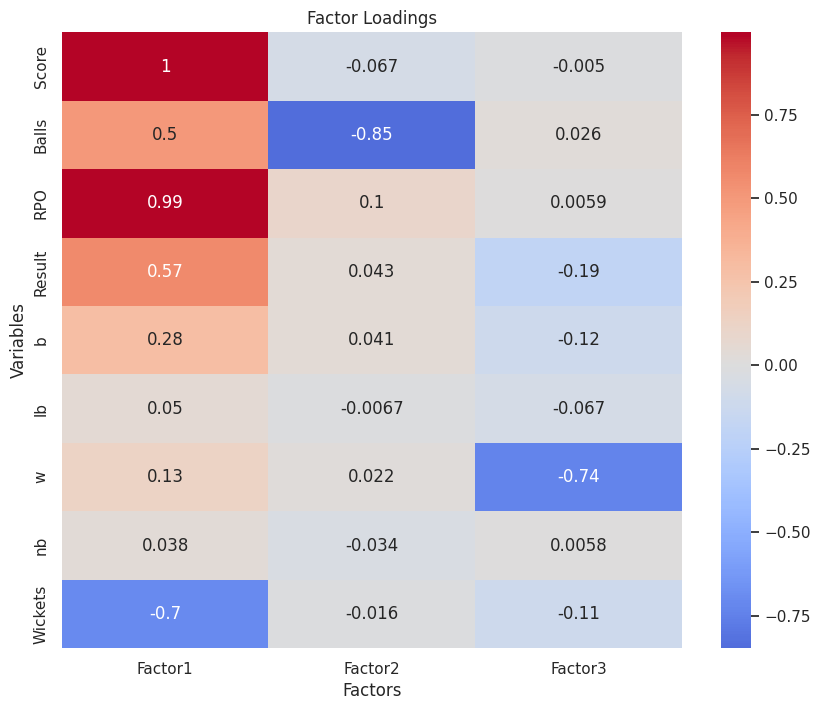

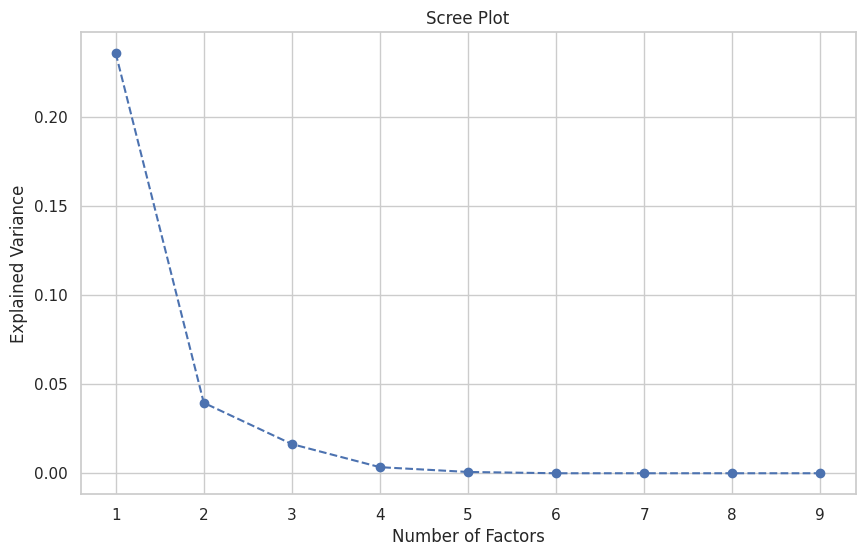

In [25]:
Factor_Analysis(df1)

###**Factor Analysis results for 2nd_innings(df2)**


Factor Loadings:

          Factor1   Factor2   Factor3
Score   -0.993326 -0.091653  0.005520
Balls   -0.591829 -0.795499 -0.061100
RPO     -0.807456  0.581116  0.039597
Result  -0.141974  0.344667 -0.847009
b       -0.192958 -0.032834  0.227817
lb      -0.427987 -0.102501  0.016240
w       -0.260610 -0.187449  0.088067
nb      -0.081637 -0.158856  0.073337
Wickets  0.149106 -0.489878  0.802189


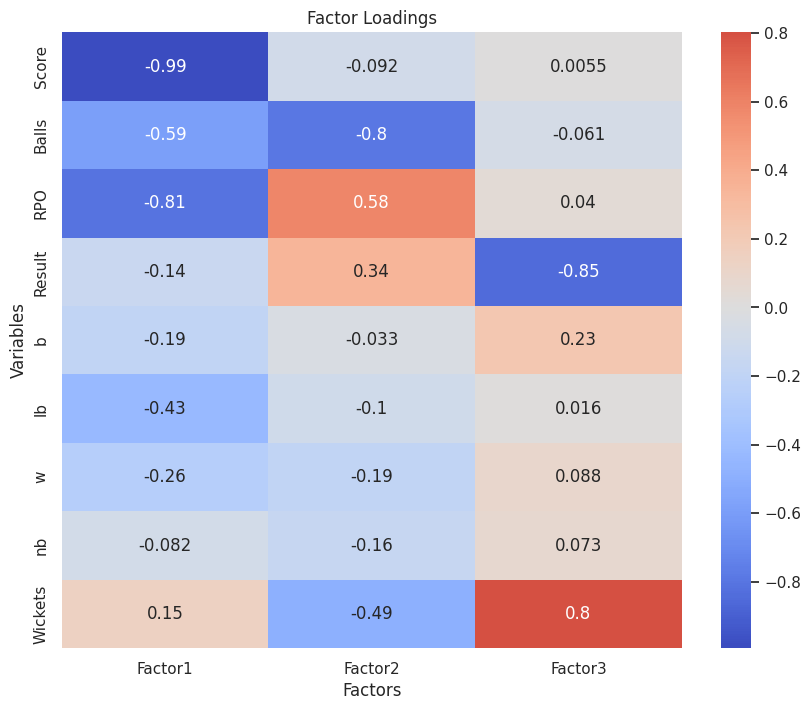

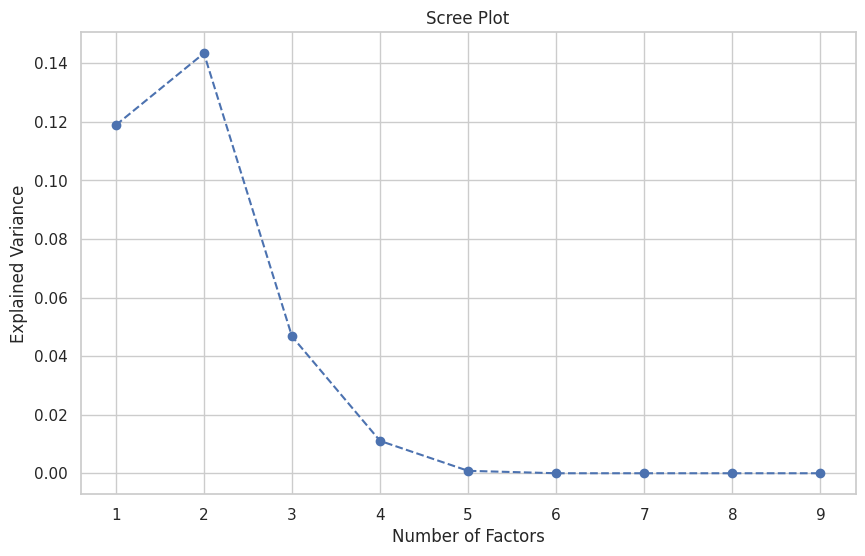

In [26]:
Factor_Analysis(df2)

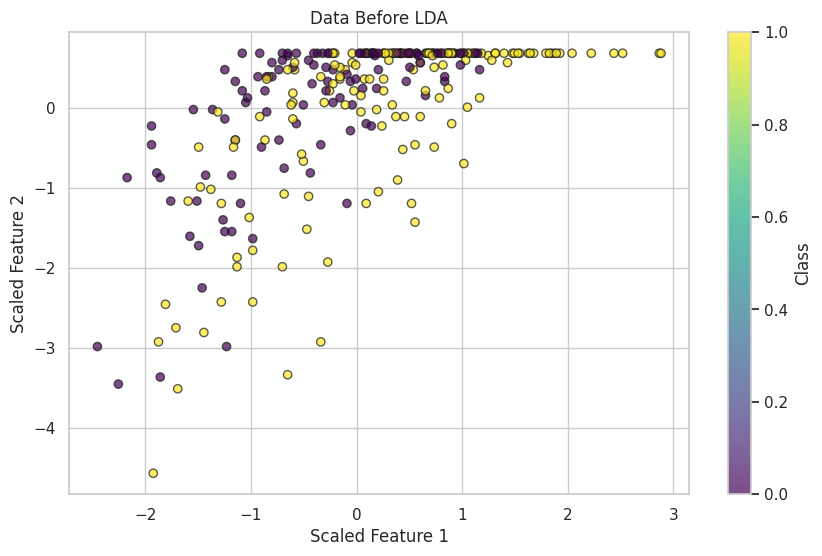

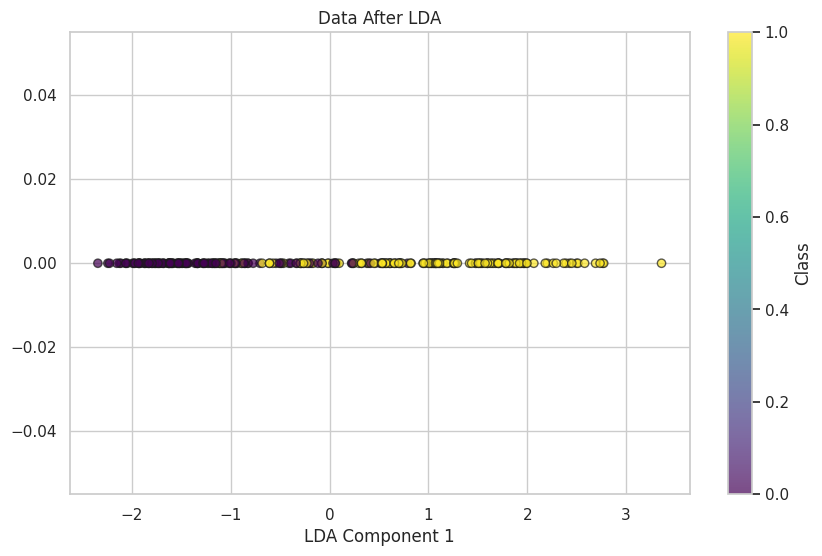

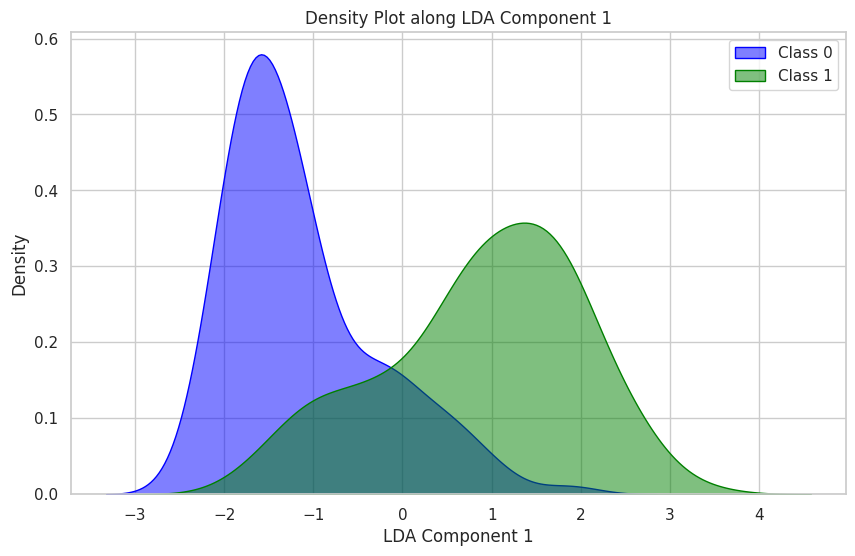

LDA coefficients: [[ 3.40515573 -1.41359441 -2.21700871 -0.20695466 -0.2168223   0.47503427
  -0.11115502 -2.616951  ]]


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

df = pd.concat([df1, df2], axis=0)
X = df.drop('Result', axis=1)
y = df['Result']

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform LDA
lda = LDA(n_components=1)  # Reduce to 1 component(as we have 2 prediction classes 1/0)
X_lda = lda.fit_transform(X_scaled, y)

# Plot data before LDA (on the first two features for visualization)
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', alpha=0.7, edgecolor='k')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')
plt.title('Data Before LDA')
plt.colorbar(label='Class')
plt.show()

# Plot data after LDA
plt.figure(figsize=(10, 6))
plt.scatter(X_lda, np.zeros(len(X_lda)), c=y, cmap='viridis', alpha=0.7, edgecolor='k')
plt.xlabel('LDA Component 1')
plt.title('Data After LDA')
plt.colorbar(label='Class')
plt.show()

# Plot density along the LDA component axis
plt.figure(figsize=(10, 6))
sns.kdeplot(X_lda[y == 0].ravel(), fill=True, label='Class 0', color='blue', alpha=0.5)
sns.kdeplot(X_lda[y == 1].ravel(), fill=True, label='Class 1', color='green', alpha=0.5)
plt.xlabel('LDA Component 1')
plt.title('Density Plot along LDA Component 1')
plt.legend()
plt.show()

# Interpretation
print(f"LDA coefficients: {lda.coef_}")


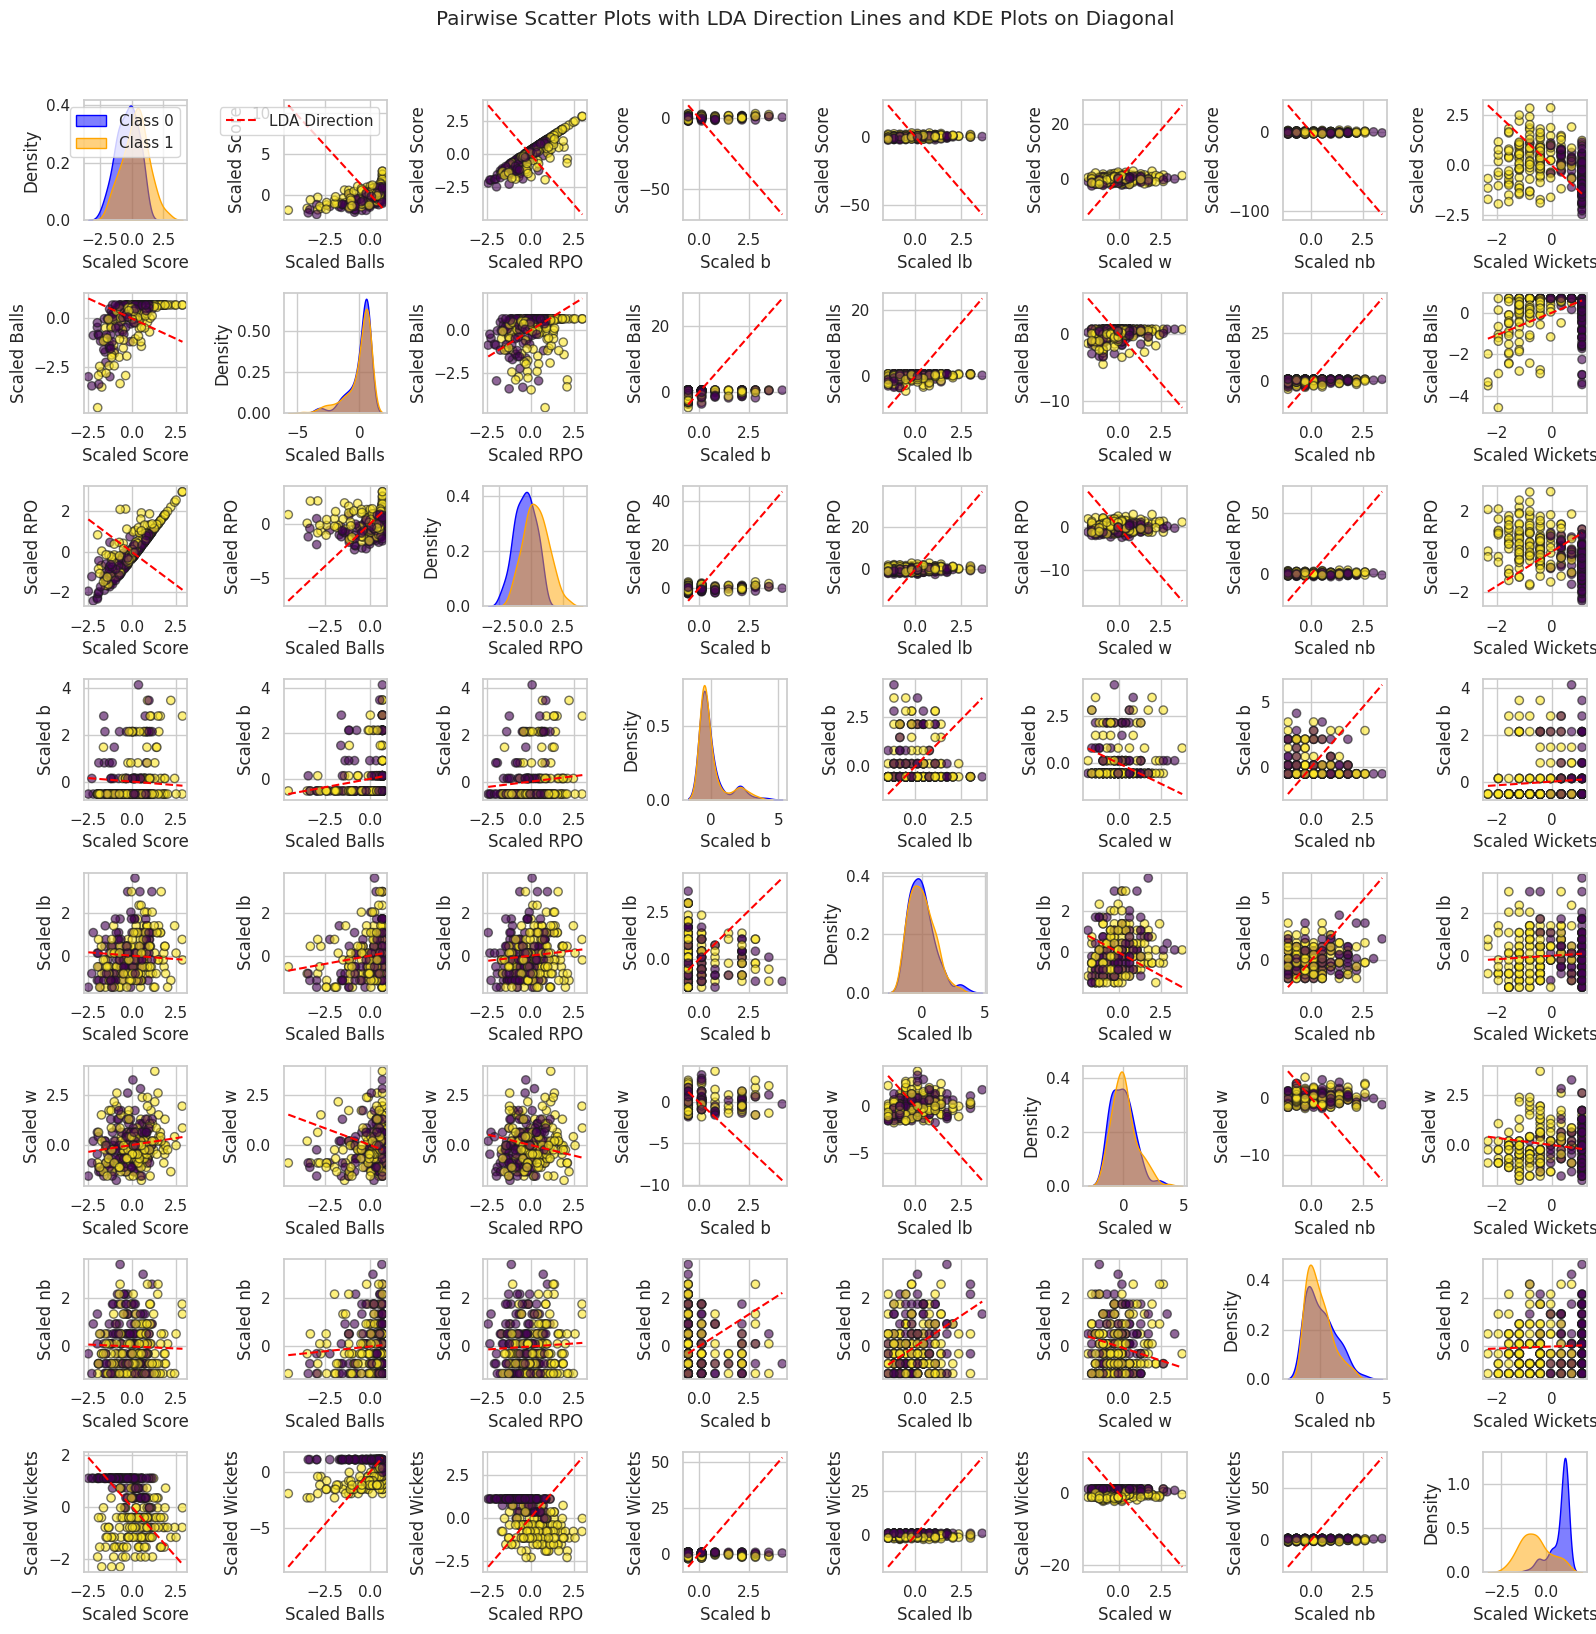

In [30]:
# Plotting pairwise LDA with kernel density distribution of each variable in diagonal to check how LDA separates data across 2 features
num_features = X_scaled.shape[1]
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=y.index)  # Align index with y
plt.figure(figsize=(2 * num_features, 2 * num_features))

for i in range(num_features):
    for j in range(num_features):
        plt.subplot(num_features, num_features, i * num_features + j + 1)

        if i == j:  # Diagonal: KDE plot for each feature per class
            sns.kdeplot(X_scaled_df.iloc[:, i][y == 0], label='Class 0', fill=True, color='blue', alpha=0.5)
            sns.kdeplot(X_scaled_df.iloc[:, i][y == 1], label='Class 1', fill=True, color='orange', alpha=0.5)
            plt.xlabel(f'Scaled {X.columns[i]}')
            plt.ylabel('Density')
            if i == 0:
                plt.legend()

        else:  # Off-diagonal: Pairwise scatter plot with LDA direction
            plt.scatter(X_scaled_df.iloc[:, j], X_scaled_df.iloc[:, i], c=y, cmap='viridis', alpha=0.6, edgecolor='k')
            plt.xlabel(f'Scaled {X.columns[j]}')
            plt.ylabel(f'Scaled {X.columns[i]}')

            # Calculate LDA line direction for this pair of features
            # Assuming lda_direction is calculated somewhere before this code
            lda_slope = lda.coef_[0][i] / lda.coef_[0][j] if lda.coef_[0][j] != 0 else 0 # Replace with your calculation for lda_direction if needed
            lda_intercept = 0  # Centered at the origin
            x_vals = np.array([X_scaled_df.iloc[:, j].min(), X_scaled_df.iloc[:, j].max()])
            y_vals = lda_slope * x_vals + lda_intercept
            plt.plot(x_vals, y_vals, color='red', linestyle='--', linewidth=1.5, label='LDA Direction')
            if i == 0 and j == 1:
                plt.legend()

plt.suptitle('Pairwise Scatter Plots with LDA Direction Lines and KDE Plots on Diagonal', y=1.02)
plt.tight_layout()
plt.show()